In [1]:
import numpy as np
from fractions import Fraction as F
class ConsistentTuning:
    def __init__(self, aI, a, bI, b):

        self.Da = aI[0]
        self.Sa = aI[1]
        self.Db = bI[0]
        self.Sb = bI[1]
        self.a = a
        self.b = b
        self.d = aI[0]*bI[1] - bI[0]*aI[1]

    def vec_to_freq(self, I):    
        D, S = I
        za =  -F(self.Db, self.d)*S + F(self.Sb, self.d)*D
        zb =  F(self.Da, self.d)*S - F(self.Sa, self.d)*D
        f =  self.a**za * self.b**zb
        return f
    



In [2]:
def freq_to_ct_norm(freq, base_freq=440.0, octave_fr=2.0):
    return np.log(freq/base_freq)/np.log(octave_fr)
def freq_to_ct(freq, base_freq=440.0, octave_fr=2.0, half_steps=12):
    return half_steps * 100.0 * freq_to_ct_norm(freq, base_freq=base_freq, octave_fr=octave_fr)
def ct_to_freq(ct, base_freq=440.0, octave_fr=2.0, half_steps=12):
    return base_freq * octave_fr**(ct/100.0/half_steps)


In [3]:
a = ct_to_freq(1205, base_freq=1.0)
b = ct_to_freq(1905, base_freq=1.0)
c = ConsistentTuning((2,5), 2, (3, 8), 3)

freq_to_ct(c.vec_to_freq((0,1)), base_freq=1.0)

203.91000173077484

In [85]:

c.vec_to_freq((0,2))

1.0767899833082109

0 -0.0001728370865921361
633 -0.13154271598479383
655 0.05153555854807345
1337 -0.05178845207007725
1352 0.04012817940447345
1364 -0.027318803776279255
1368 0.02165933527878534
1372 -0.018801501568908415
1391 0.013432853775631238
1398 -0.00936639931680538
1405 0.004615480851376351
1441 -0.001219361869415029
1442 0.0003170311345988875
2906 -0.23356758540598835
2909 0.1653386463267049
2922 -0.03831006357099847
2928 0.02905631827707086
2934 -0.013437205067019335
2942 0.005872212810131647
2948 -0.003628932082198437
2953 0.0001888891257537686
2954 -5.59002593817893e-05
2959 -0.0004840736370689943
2970 -5.324936477073163e-05
2975 -0.00041035604935898176
2987 -0.0011981869224559469
2988 0.0007664014216140686
3006 -0.0009572900993866725
3011 -2.939492790699176e-05
4535 -0.27031895143630313
4536 0.21346077297060723
4540 -0.10970043701629836
4547 0.020857760279563514
4552 -0.010905689560779192
4559 0.004466282158295232
4566 -0.004811570736578341
4572 0.002141685980839793
4581 -0.0009045992232390

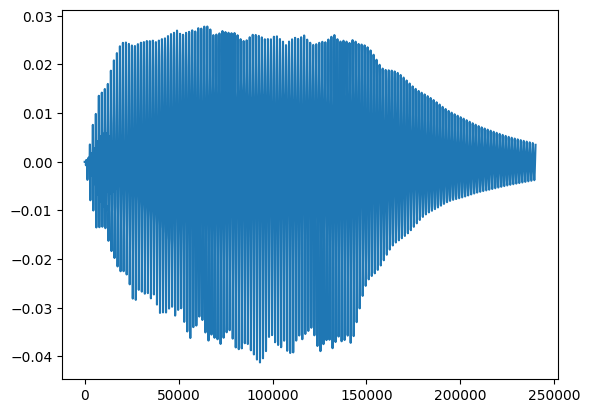

In [157]:
import numpy as np
import random 

sr = 48000

oscs = np.array([0+0j, 0+0j, 0+0j, 0+0j])

c = ConsistentTuning((2,5), 2.01, (3, 8), 3.1)
freq = 30.0
fs = freq*np.array([
    c.vec_to_freq((0,0)),
    c.vec_to_freq((2,5)),
    c.vec_to_freq((3,8)),
    c.vec_to_freq((4,10)),

])


doscs = np.array([0.99998**(i+1) * np.exp(1j * 2 * np.pi * fs[i] / sr) for i in range(len(oscs))])

coarsness = 0.1

l = []
pos = 0.0
vel = 0.0
acc = 1.0 / coarsness

for i in range(5*sr):
    l.append(sum([o.real for o in oscs])/len(oscs))
    #if((i//800)%2==0):
    #if n.imag < 0.1:
    vel += acc / sr
    pos += vel / sr
    if pos > l[-1].real and i<3*sr:
    #if((i//600)%2==0):
        pos = l[-1].real -  0.001 * random.random()
        oscs += 1j * coarsness * vel / len(oscs)
    
        vel *= - random.random()
        print(i, vel)
        
    #else:
    #    oscs[0] -= 0.001j
    #    oscs[1] -= 0.001j
    oscs *= doscs

    #for j in range(len(oscs)):
    #    oscs[j] *= doscs[j]


#for i in range(2*sr):
#    l.append(sum([o.real for o in oscs])/len(oscs))
#    #if((i//800)%2==0):
#    #if n.imag < 0.1:
#    vel += acc * 2/sr
#    pos += vel * 2/sr
#    if pos > l[-1].real:
#    #if((i//600)%2==0):
#        pos = l[-1].real - 0.0001 * random.random()
#        for j in range(len(oscs)):
#            oscs[j] += 1j * vel / len(oscs)
#    
#        vel = -vel*.99
#        print(i, vel)
#        
#    #else:
#    #    oscs[0] -= 0.001j
#    #    oscs[1] -= 0.001j
#
#    for j in range(len(oscs)):
#        oscs[j] *= doscs[j]
#

# plot the points
import matplotlib.pyplot as plt
plt.plot(l)
plt.show()

#    # now plot fft
#    import scipy.fftpack
#    
#    # Number of samplepoints
#    N = 100000
#    # sample spacing
#    T = 1.0 / 800.0
#    x = np.linspace(0.0, N*T, N)
#    y = l
#    yf = scipy.fftpack.fft(y)
#    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
#    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
#    plt.grid()
#    plt.show()

# play the sound
import sounddevice as sd
sd.play(l, sr)



(0.9999995000000417+0.0009999998333333417j)